<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%201/7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 7

In [1]:
import polars as pl
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def plot_metric(history, metric):
  plt.plot(history.history[metric], label='Training data')
  plt.plot(history.history['val_' + metric], label='Validation data')
  plt.title(metric)
  plt.ylabel(metric)
  plt.xlabel('Epoch')
  plt.legend(loc="upper right")
  plt.show()

El archivo Quimil.csv posee información diaria de ocho parámetros climáticos junto con la cantidad de radiación solar observada (la última columna).

Se desea entrenar una red neuronal para encontrar un modelo que sea capaz de predecir la radiación solar de un determinado día, al conocerse los valores de los datos climáticos actuales.

In [3]:
#!unzip datasets.zip

## Ejercicio a

Utilice el dataset Quimil.csv para llevar a cabo el entrenamiento. Ejecute varias pruebas para conseguir un modelo cuyo error total sea lo más bajo posible.


In [4]:
df = pl.read_csv('Quimil.csv',separator=';',encoding='latin1')
df.head()

Fecha,Precipitación_de_024_hs [mm],Temperatura_Máxima_del_aire_en_abrigo_a_15_m_de_altura [°C],Temperatura_Mínima_del_aire_en_abrigo_a_15_m_de_altura [°],Humedad_relativa_media [%],Velocidad_media_del_viento_[km/h],Temperatura_Media_del_aire_en_abrigo_a_15_m_de_altura [°C],Máxima_velocidad_del_viento [km/h],Presión_atmosférica_media [hPa],Radiación_Global [MJ/m2]
i64,f64,f64,f64,i64,f64,f64,f64,f64,f64
1,0.3,24.4,9.5,73,10.2,13.8,36.8,996.5,8.2
2,0.0,23.6,1.0,46,2.5,13.5,26.4,1003.6,23.7
3,0.0,27.3,1.5,37,4.4,14.2,27.5,1002.1,24.2
4,0.0,29.8,6.1,30,6.6,17.4,29.5,999.7,24.1
5,0.0,32.4,10.1,31,9.7,20.1,32.3,992.9,24.4


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9e577751b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9e577756f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9e57774f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9e57775c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9e57775ed0>],
 'means': []}

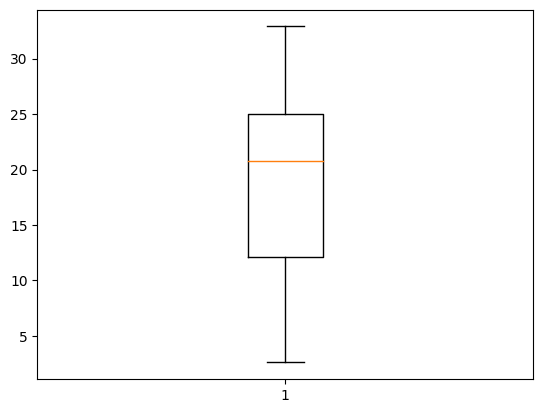

In [5]:
plt.boxplot(df['Radiación_Global [MJ/m2]'])

In [6]:
X = df.drop(columns='Radiación_Global [MJ/m2]').to_numpy()
y = df['Radiación_Global [MJ/m2]'].to_numpy()

d_in = 9  # Número de variables de entrada.
d_out = 1 # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = Sequential([
    Dense(64, activation='tanh', input_shape=(d_in,)),
    Dense(d_out)  # Capa de salida con una neurona para la regresión
	])

modelo.compile('adam', loss='mse',metrics=['RootMeanSquaredError'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(X, y, epochs=200, batch_size=30, verbose=True, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 4s 219ms/step - loss: 396.4582 - root_mean_squared_error: 19.9113 - val_loss: 593.3069 - val_root_mean_squared_error: 24.3579
Epoch 2/200
3/3 [==============================] - 0s 28ms/step - loss: 389.1114 - root_mean_squared_error: 19.7259 - val_loss: 582.8625 - val_root_mean_squared_error: 24.1425
Epoch 3/200
3/3 [==============================] - 0s 42ms/step - loss: 380.6127 - root_mean_squared_error: 19.5093 - val_loss: 568.9025 - val_root_mean_squared_error: 23.8517
Epoch 4/200
3/3 [==============================] - 0s 37ms/step - loss: 370.0747 - root_mean_squared_error: 19.2373 - val_loss: 551.1840 - val_root_mean_squared_error: 23.4773
Epoch 5/200
3/3 [==============================] - 0s 53ms/step - loss: 357.0237 - root_mean_squared_error: 18.8951 - val_loss: 528.3221 - val_root_mean_squared_error: 22.9853
Epoch 6/200
3/3 [==============================] - 0s 40ms/step - loss: 340.3419 - root_mean_squared_error: 18.4484 - v

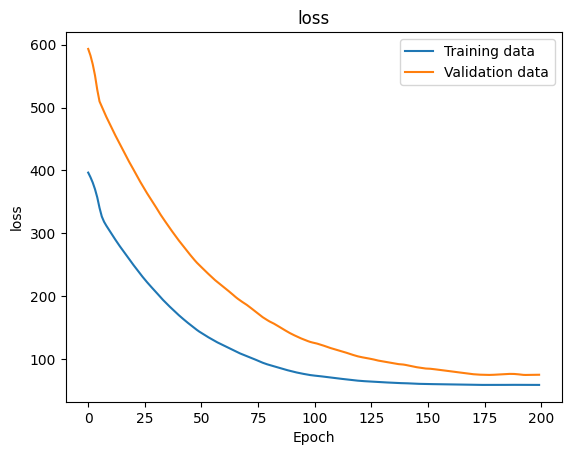

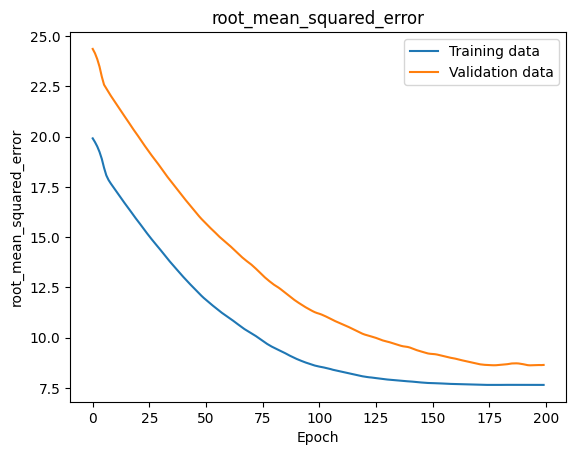

In [8]:
plot_metric(history, "loss")
plot_metric(history, "root_mean_squared_error")

## Ejercicio b

Utilice el modelo conseguido en a) para predecir la radiación solar diaria de los datos usados en el entrenamiento.

¿Cuál es el día que menor error se obtuvo en la predicción? ¿Y el día con máximo error?


In [23]:
y_pred = modelo.predict(X)

3/3 [==============================] - 0s 5ms/step


In [27]:
y_pred = pl.Series(y_pred.flatten())

(array([ 3.,  8., 16., 12., 10.,  8.,  3.,  8.,  4.,  6.]),
 array([-15.42644157, -12.39644157,  -9.36644157,  -6.33644157,
         -3.30644157,  -0.27644157,   2.75355843,   5.78355843,
          8.81355843,  11.84355843,  14.87355843]),
 <BarContainer object of 10 artists>)

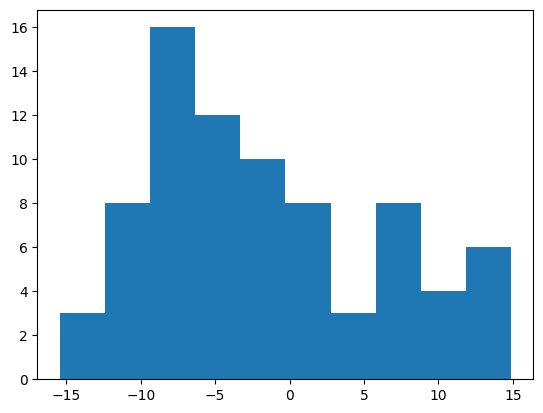

In [40]:
plt.hist((y_pred-df['Radiación_Global [MJ/m2]']))

## Ejercicio c

Conseguido el modelo ¿Qué predice la red conseguida sobre los datos que están en el dataset Quimil_pred.csv?

In [32]:
df_test = pl.read_csv('Quimil_pred.csv',separator=';',encoding='latin1')

In [33]:
modelo.predict(df_test.to_numpy())

1/1 [==============================] - 0s 21ms/step


array([[17.473557],
       [17.473557],
       [17.473557],
       [17.473557],
       [17.473557]], dtype=float32)